In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
# we are using this for model tunning

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/Life Expectancy Data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
Life_Expectancy_Data = pd.read_csv("/content/Life Expectancy Data.csv")
data = Life_Expectancy_Data.copy()
data = data.dropna()            # If there is a missing or empty observation, delete it. Or 'data.fillna(data.mean(), inplace=True)' with this make NaN values take mean

lindata = data.copy()
multidata = data.copy()
polydata = data.copy()
RFdata = data.copy()
logdata = data.copy()

LINEAR REGRESSION

In [4]:
lindata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [5]:
lindata.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


CORRELATION

In [6]:
lindata.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


Looking at heatmap, there is a good relationship (correlation exists) between the best 'GDP' and 'percentage expenditure' in the Life Expectation data.

<Axes: >

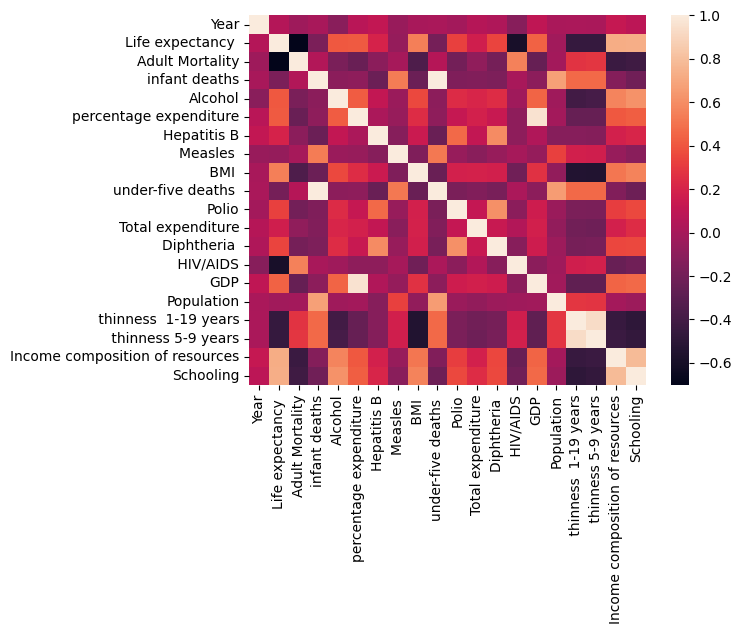

In [7]:
# plot the heatmap
corr = lindata.corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Here it is better to establish a linear model between 'GDP' and 'percentage expenditure'. Let's see what our spending percentages are compared to the "GDP" increase. Let's create and fit our linear model.

In [8]:
linear_reg = LinearRegression()
x = lindata.GDP.values.reshape(-1,1)
y = lindata['percentage expenditure'].values.reshape(-1,1)

linear_reg.fit(x,y)

LinearRegression()

y = b0 + b1*x is our linear regression model.
Let's see estimated percentage of expenditure in GDP 10 thousand:

In [9]:
b0 = linear_reg.predict(([[10000]]))
print("b0: ", b0)

b1 = linear_reg.coef_
print("b1: ", b1)

b0:  [[1351.02549826]]
b1:  [[0.14705833]]


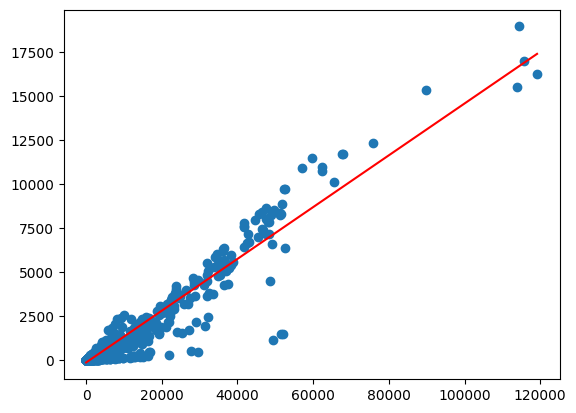

Mean Absolute Error:  50943.94783778519
Mean Squared Error:  3456291221.6604414
Root Mean Squared Error:  58790.230665140625


In [10]:
x_array = np.arange(min(lindata.GDP),max(lindata.GDP)).reshape(-1,1)  # this for information about the line to be predicted

plt.scatter(x,y)
y_head = linear_reg.predict(x_array)                                 # this is predict percentage of expenditure
plt.plot(x_array,y_head,color="red")
plt.show()

from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))

In [11]:
print(r2_score(y, linear_reg.predict(x)))

0.920254296978608


Estimate made has a 92% accuracy.

**Multi Linear Regression**
Let's take a look at the variable that depends on Life Expectancy.
If there is missing observation or empty, delete it. Or 'data.fillna (data.mean (), inplace = True)' with this make NaN values averaged.
When we look at the data, Country and Status columns are composed of objects. Because we need to be int or float.
and let's take the last two columns (Income composition of resources, schooling) as independent variables.

In [13]:
Life_Expectancy_Data = pd.read_csv("/content/Life Expectancy Data.csv")
data = Life_Expectancy_Data.copy()
data = data.dropna()

multidata = data.copy()

multidata.drop(["Country", "Status"], axis=1, inplace=True)
# When we look at the data, Country and Status columns are composed of objects. Because we need to be int or float.

x = multidata.iloc[:, [-2,-1]].values
# I took the last two columns (Income composition of resources, schooling) as independent variables.
y = multidata["percentage expenditure"].values.reshape(-1,1)
# our independent variable

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [15]:
print("b0: ", lm.intercept_)
print("b1,b2: ", lm.coef_)

b0:  [-2735.63211318]
b1,b2:  [[1755.9938428   195.23412791]]


We look at what the data set we created here will affect how much it will affect our survival.

In [16]:
new_data = [[0.4,8], [0.5,10]]
new_data = pd.DataFrame(new_data).T
# .T is transfor the chart.
model.predict(new_data)

array([[-1935.6175121 ],
       [13264.65990838]])

Now let's look at the correctness of the evaluation we made. If the difference between the train error and the test error is not much, modeling is good

In [17]:
RMSE = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
RMSE

1656.8188428933993

In [18]:
model.score(x_train, y_train)

0.20013529701170407

CV  R2
  value of the model:

In [19]:
cross_val_score(model, x_train,  y_train, cv= 10, scoring="r2").mean()

0.2063663813480728

In [20]:
y_head = model.predict(x_test)
y_head[0:5]

array([[ 532.26736558],
       [1204.73203886],
       [2006.21418475],
       [  29.9417957 ],
       [-880.31581876]])

In [21]:
y_test_1 =np.array(range(0,len(y_test)))

Test r2 error =  0.09821875898006771


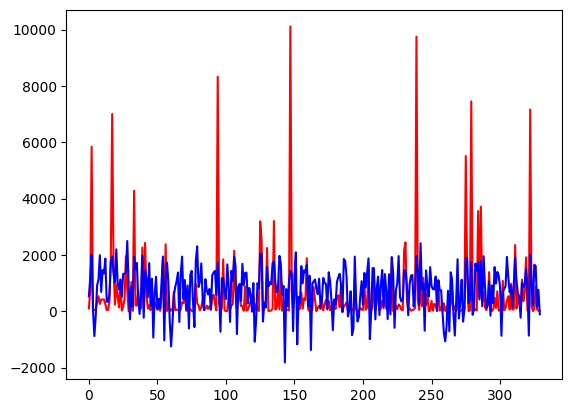

In [23]:
#R2 value:
R2_degeri = r2_score(y_test, y_head)
print("Test r2 error = ",R2_degeri)

plt.plot(y_test_1,y_test,color="r")
plt.plot(y_test_1,y_head,color="blue")
plt.show()

POLYNOMIAL REGRESSION

In [25]:
from sklearn.preprocessing import PolynomialFeatures     # this gives properties of polynomial

Life_Expectancy_Data = pd.read_csv("/content/Life Expectancy Data.csv")
data = Life_Expectancy_Data.copy()
data = data.dropna()

polydata = data.copy()

Let's see what our spending percentages are compared to the "GDP" increase. Let's create and fit our linear model.

In [26]:
linear_reg = LinearRegression()
x = polydata.GDP.values.reshape(-1,1)
y = polydata['percentage expenditure'].values.reshape(-1,1)

linear_reg.fit(x,y)


LinearRegression()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

Let's look at the 15th degree. If it's not, we should change it.

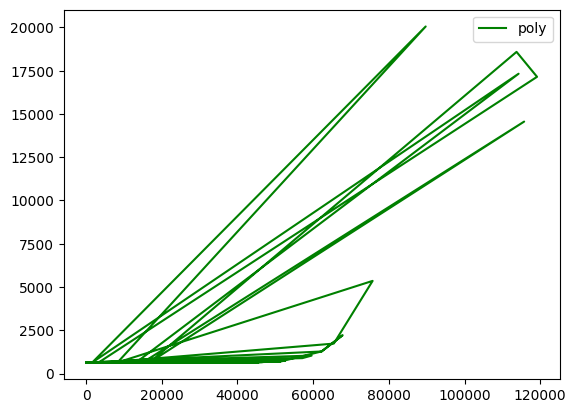

In [28]:
polynomial_regression = PolynomialFeatures(degree = 15)
x_polynomial = polynomial_regression.fit_transform(x)

linear_reg2 = LinearRegression()
linear_reg2.fit(x_polynomial,y)

y_head = linear_reg2.predict(x_polynomial)

plt.plot(x,y_head,color="green",label="poly")
plt.legend()
plt.show()


With degree we determine the precision of our forecast. If it is too large, it will deteriorate, so it is necessary to determine according to the data.

In [29]:
pol_reg = PolynomialFeatures(degree = 8)

level_poly = pol_reg.fit_transform(x_train)
# According to the polynomial, x_train is defined

lm = LinearRegression()
lm.fit(level_poly,y_train)

LinearRegression()

In [31]:
y_head = lm.predict(pol_reg.fit_transform(x_train))
y_test =np.array(range(0,len(y_train)))

Consistency and scatter drawing of  r2
  model:

r2 value:  0.6496357950943785


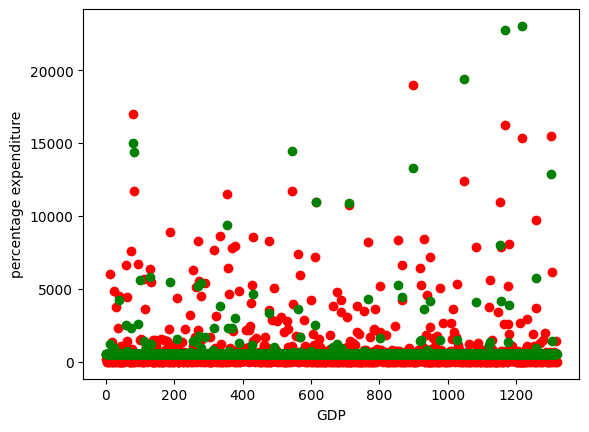

In [36]:
r2 = r2_score(y_train, y_head)
print("r2 value: ", r2)
# percentage of significance

plt.scatter(y_test, y_train, color="red")
plt.scatter(y_test, y_head, color = "g")
plt.xlabel("GDP")
plt.ylabel("percentage expenditure")
plt.show()

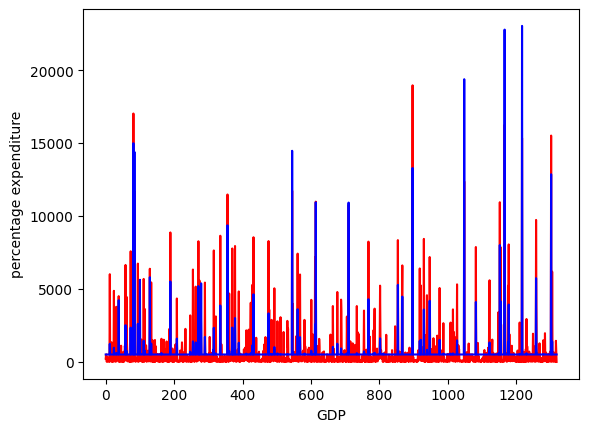

In [37]:
plt.plot(y_test,y_train, color="red")
plt.plot(y_test, y_head, color = "blue")
plt.xlabel("GDP")
plt.ylabel("percentage expenditure")
plt.show()

**Decision Tree Regression**

In [39]:
from sklearn.tree import DecisionTreeRegressor               # for our predict model

Life_Expectancy_Data = pd.read_csv("/content/Life Expectancy Data.csv")
data = Life_Expectancy_Data.copy()
data = data.dropna()                                         # same is done

DTdata = data.copy()
DTdata

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [40]:
x = polydata.GDP.values.reshape(-1,1)
y = polydata['percentage expenditure'].values.reshape(-1,1)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

Let's see Expenditure percentage estimation of the country with "GDP" value of 1000:

In [42]:
DT_reg = DecisionTreeRegressor()           # created model
DT_reg.fit(x_train,y_train)                # fitted model according to train values

print(DT_reg.predict([[1000]]))

[98.68367951]


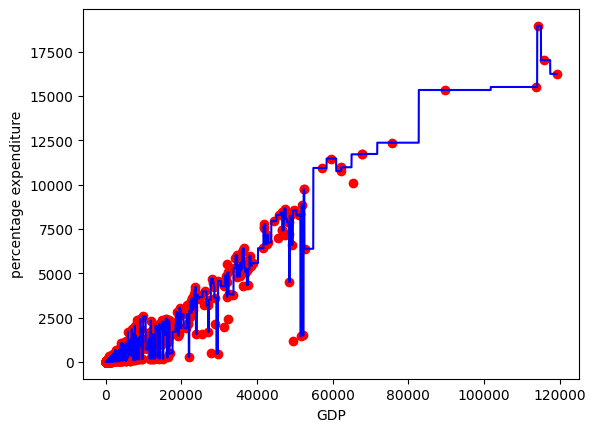

In [43]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)   # line information to be drawn as a predict
y_head = DT_reg.predict(x_array)                        # percentage of spend estimate

plt.scatter(x,y, color="red")
plt.plot(x_array,y_head,color="blue")
plt.xlabel("GDP")
plt.ylabel("percentage expenditure")
plt.show()

**Random Forest Regression**
A logic of DecisionTree. For example, 3000 sample data is selected from 100 thousand data and the result is obtained.

In [45]:
from sklearn.ensemble import RandomForestRegressor           # for our predict model

Life_Expectancy_Data = pd.read_csv("/content/Life Expectancy Data.csv")
data = Life_Expectancy_Data.copy()
data = data.dropna()
RFdata = data.copy()

In [46]:
x = polydata.GDP.values.reshape(-1,1)
y = polydata['percentage expenditure'].values.reshape(-1,1)

Create regression with 5 DecisionTreeReg in the sklearn RandomForestRegressor model. We can do as many as we want. Giving random_state does not change the outcome. When we say 1, it should not change once.

In [47]:
RF_reg = RandomForestRegressor(n_estimators=100, random_state=42)
RF_reg.fit(x,y)
# the best fit line is drawn

RandomForestRegressor(random_state=42)

Expenditure percentage estimation of the country with "GDP" value of 1000:

In [48]:
print(RF_reg.predict([[1000]]))

[73.33903837]


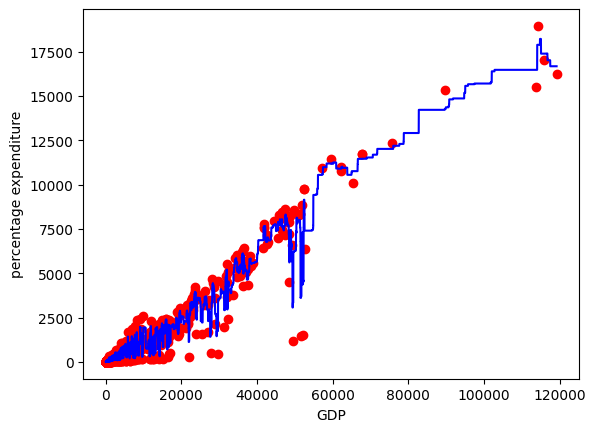

In [50]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head = RF_reg.predict(x_array)

plt.scatter(x,y, color="red")
plt.plot(x_array,y_head,color="blue")
plt.xlabel("GDP")
plt.ylabel("percentage expenditure")
plt.show()


**Logistic Regression Model**
The aim is to reveal the class that will occur when a set of x values that have not yet been observed, to predict a classifier.
For the classification problem, to establish a linear model that defines the relationship between dependent and independent variables.
Regarding whether the dependent variable is 1 or 0 or yes or no status
** In this data, we will examine the states of Developed countries (Developed) = 0 and Developing = 1. I want to find the level of development I want, so close to 1!

When we look at the country column data, it consists of objects, let's drop it. Because we need int or float values.

In [51]:
logdata.drop(["Country"], axis=1, inplace=True)
logdata.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [52]:
logdata["Status"].value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

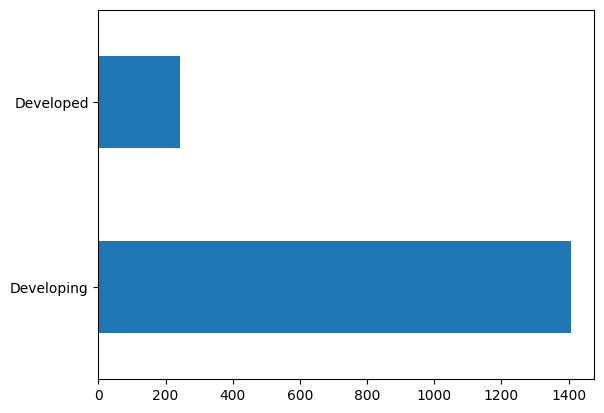

In [53]:
logdata["Status"].value_counts().plot.barh();

We need to create binary, that is, from 0 to 1. Let's do the necessary transformations.

In [54]:
logdata.Status = [1 if each == "Developing" else 0 for each in logdata.Status]

Deriving some Descriptive Stats

In [55]:
logdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1649.0,2.007841e+03,4.087711e+00,2000.00000,2005.000000,2.008000e+03,2.011000e+03,2.015000e+03
Status,1649.0,8.532444e-01,3.539695e-01,0.00000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
Life expectancy,1649.0,6.930230e+01,8.796834e+00,44.00000,64.400000,7.170000e+01,7.500000e+01,8.900000e+01
Adult Mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Hepatitis B,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_12['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

In [56]:
y = logdata["Status"]
X_data = logdata.drop(["Status"], axis=1)

In [58]:
#*** Normalize ***#

X = (X_data - np.min(X_data))/(np.max(X_data) - np.min(X_data)).values

Let's build a model through statsmodels and make it fit. Here, the meaning of the model and how much of this variable affects us, comes from this table.

In [59]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

         Current function value: 0.150274
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                 1649
Model:                          Logit   Df Residuals:                     1629
Method:                           MLE   Df Model:                           19
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.6397
Time:                        04:48:16   Log-Likelihood:                -247.80
converged:                      False   LL-Null:                       -687.70
Covariance Type:            nonrobust   LLR p-value:                2.266e-174
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Year                                1.1540      0.454      2.541      0.011       0.264       2.044
Life expectancy                     3.9170      1.395      2.808      0.005       1.183       6.651
Adult Mortality                     8.9129      1.573      5.666      0.000       5.830      11.996
infant deaths                     193.0996    567.163      0.340      0.734    -918.519    1304.718
Alcohol                            -7.0471      0.741     -9.507      0.000      -8.500      -5.594
percentage expenditure              2.6330      2.749      0.958      0.338      -2.755       8.021
Hepatitis B                        -2.1891      0.551     -3.975      0.000      -3.269      -1.110
Measles                            -4.6191      8.644     -0.534      0.593     -21.561      12.323
 BMI                                0.6859      0.497      1.379      0.168      -0.289       1.661
under-five deaths                 428.0952    667.107      0.642      0.521    -879.411    1735.602
Polio                               0.4442      0.755      0.588      0.556      -1.036       1.924
Total expenditure                   0.4667      0.649      0.719      0.472      -0.805       1.738
Diphtheria                          1.4299      0.773      1.850      0.064      -0.085       2.945
 HIV/AIDS                        6172.1062    1.4e+05      0.044      0.965   -2.68e+05     2.8e+05
GDP                                -5.0199      2.755     -1.822      0.068     -10.419       0.379
Population                        -13.5912     11.515     -1.180      0.238     -36.159       8.977
 thinness  1-19 years              21.1931      7.053      3.005      0.003       7.370      35.016
 thinness 5-9 years               -11.7773      6.500     -1.812      0.070     -24.516       0.962
Income composition of resources    -0.7261      1.341     -0.541      0.588      -3.355       1.903
Schooling                          -2.5020      1.499     -1.669      0.095      -5.439       0.435
===================================================================================================

Possibly complete quasi-separation: A fraction 0.52 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [60]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [61]:
# constant value
loj_model.intercept_

array([5.83327627])

In [62]:
loj_model.coef_

array([[ 1.08208352, -1.39357844,  3.4092507 ,  0.47089776, -5.35962717,
        -0.78837698, -1.44070589,  0.37059599, -0.05002695,  0.43758173,
         0.22862697, -0.10185549,  0.72963257,  0.51727771, -1.44175632,
         0.42676196,  1.95007174,  1.79088634, -1.29839592, -1.92931239]])

**PREDICT and MODEL TUNNING**

In [64]:
y_pred = loj_model.predict(X)              # predict

**Confusion Matrix**: Those that are 1 (PP) when it is 1 in reality, 0 (PN) when it is 1, 1 (NP) when it is 0 when it is 0 (NN) when it is 0.

In [65]:
confusion_matrix(y, y_pred)

array([[ 169,   73],
       [  45, 1362]])

In [66]:
accuracy_score(y, y_pred)

0.9284414796846574

One of the outputs that will evaluate the results of a most detailed classification algorithm.

In [67]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       242
           1       0.95      0.97      0.96      1407

    accuracy                           0.93      1649
   macro avg       0.87      0.83      0.85      1649
weighted avg       0.93      0.93      0.93      1649



In [68]:
loj_model.predict(X)[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Using the 'predict_proba' module if we want to give the noble values rather than the values given above 1 and 0.
Returns the values of 0 in the index or left side of 0, and values of 1 in the index 1 or of the right side of the matrix.

In [69]:
loj_model.predict_proba(X)[0:10][:,0:2]                # Top 10

array([[3.37705587e-04, 9.99662294e-01],
       [2.48289180e-04, 9.99751711e-01],
       [2.56463490e-04, 9.99743537e-01],
       [2.56505623e-04, 9.99743494e-01],
       [2.45099743e-04, 9.99754900e-01],
       [2.40236658e-04, 9.99759763e-01],
       [2.28381644e-04, 9.99771618e-01],
       [2.23361824e-04, 9.99776638e-01],
       [2.02091865e-04, 9.99797908e-01],
       [2.15773261e-04, 9.99784227e-01]])

Now let's try to model the ten prediction probability values above 'predict_proba'.

In [70]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [71]:
y_probs[0:10]               # top 10

array([0.99966229, 0.99975171, 0.99974354, 0.99974349, 0.9997549 ,
       0.99975976, 0.99977162, 0.99977664, 0.99979791, 0.99978423])

Put our guess values here in the loop and give it 1 to 0.5 and 0 to the little ones.

In [72]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]
y_pred[0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [73]:
confusion_matrix(y, y_pred)

array([[ 169,   73],
       [  45, 1362]])

In [74]:
accuracy_score(y, y_pred)

0.9284414796846574

In [75]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       242
           1       0.95      0.97      0.96      1407

    accuracy                           0.93      1649
   macro avg       0.87      0.83      0.85      1649
weighted avg       0.93      0.93      0.93      1649



In [76]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.99966229, 0.99975171, 0.99974354, 0.99974349, 0.9997549 ])

In [77]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

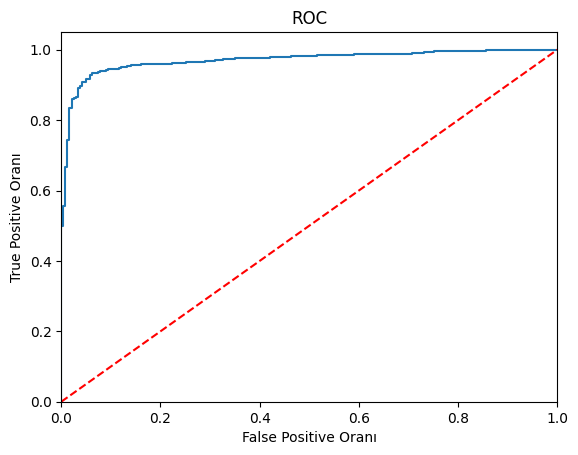

In [78]:
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

Here,

blueline: The graphic of our success regarding the model we have established.
redline: If we don't do anything, our model will be this way.

In [79]:
# test train is subjected to separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

**Let's create and fit our model**

In [80]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [81]:
accuracy_score(y_test, loj_model.predict(X_test))

0.9030303030303031

Finally Tunned model score:

In [82]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.8878787878787879

**Result**: From this data, we understand: 89% of the countries that are developing are developing countries, and the effects of the variables that will question life expectancies can be examined